In [1]:
import os
import pandas as pd
import geopandas as gpd
import getpass
from mappymatch import package_root
from mappymatch.constructs.trace import Trace
from mappymatch.utils.plot import plot_trace
from mappymatch.utils.plot import plot_geofence
from mappymatch.constructs.geofence import Geofence
from mappymatch.maps.nx.nx_map import NxMap, NetworkType
from mappymatch.utils.plot import plot_map
from mappymatch.matchers.lcss.lcss import LCSSMatcher
from mappymatch.utils.plot import plot_matches
from mappymatch.utils.plot import plot_path

user = getpass.getuser().lower()


# !pip install mappymatch

In [2]:
## Define file name
file_name = 'location.csv'

## Define Box System Root Directory
box_dir = os.path.join(
    "/Users", user, "Library", "CloudStorage", "Box-Box"
    )

## Define BAUS directory on Box for .csv output files
file_dir = os.path.join(
    box_dir, "Modeling and Surveys", "Surveys", "Travel Diary Survey",
    "Biennial Travel Diary Survey", "Data",'2023', "Full Unweighted 2023 Dataset"
)

file_path = os.path.join(file_dir, file_name)

In [3]:
df = pd.read_csv(file_path)
df.head()

trip_id          collect_time  accuracy  bearing  speed       lat  \
0  2333407402022  2023-11-02T00:23:43Z      13.0    120.0    4.0  37.85270   
1  2333407402022  2023-11-02T00:23:50Z       8.0    175.0    4.0  37.85227   
2  2333407402022  2023-11-02T00:24:04Z      12.0    185.0    4.0  37.85163   
3  2333407402022  2023-11-02T00:24:23Z       8.0    129.0    4.0  37.85092   
4  2333407402022  2023-11-02T00:24:49Z      11.0     73.0    4.0  37.85138   

         lon  
0 -122.21255  
1 -122.21236  
2 -122.21239  
3 -122.21197  
4 -122.21071

In [4]:
trip_id_sample = df.sample()['trip_id'].values[0]
trip_id_sample = 2347455701047
# trip_id_sample = 2333407402022

In [5]:
gdf = df[df['trip_id']==trip_id_sample].copy()
display(gdf.sort_values(by='collect_time', ascending=True))
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.lon, gdf.lat), crs=4326)
trace = Trace.from_geo_dataframe(gdf)

trip_id          collect_time  accuracy  bearing  speed  \
1752492  2347455701047  2023-10-29T01:22:39Z       4.0     -1.0   -1.0   
1752493  2347455701047  2023-10-29T01:23:10Z       5.0    308.0    6.0   
1752494  2347455701047  2023-10-29T01:23:14Z       5.0    332.0   12.0   
1752495  2347455701047  2023-10-29T01:23:24Z       5.0    358.0   17.0   
1752496  2347455701047  2023-10-29T01:23:29Z       5.0    353.0   16.0   
1752497  2347455701047  2023-10-29T01:23:40Z      10.0    327.0   15.0   
1752498  2347455701047  2023-10-29T01:23:56Z       5.0    320.0   11.0   
1752499  2347455701047  2023-10-29T01:24:46Z      11.0    286.0    8.0   
1752500  2347455701047  2023-10-29T01:24:48Z      10.0    247.0    8.0   
1752501  2347455701047  2023-10-29T01:24:58Z       5.0    226.0   16.0   
1752502  2347455701047  2023-10-29T01:25:40Z       5.0    217.0   18.0   
1752503  2347455701047  2023-10-29T01:27:08Z       5.0    232.0   12.0   
1752504  2347455701047  2023-10-29T01:27:34Z       5.0    244.0    9.0   
1752505  2347455701047  2023-10-29T01:27:37Z       5.0    274.0   10.0   
1752506  2347455701047  2023-10-29T01:27:41Z       5.0    338.0   11.0   
1752507  2347455701047  2023-10-29T01:27:45Z       5.0     45.0   11.0   
1752508  2347455701047  2023-10-29T01:27:47Z       5.0     79.0    9.0   
1752509  2347455701047  2023-10-29T01:27:51Z       5.0    132.0   13.0   
1752510  2347455701047  2023-10-29T01:28:06Z       5.0    141.0   21.0   
1752511  2347455701047  2023-10-29T01:29:05Z       5.0    143.0   31.0   
1752512  2347455701047  2023-10-29T01:29:36Z       5.0    138.0   33.0   
1752513  2347455701047  2023-10-29T01:31:12Z       5.0    137.0   32.0   
1752514  2347455701047  2023-10-29T01:32:22Z       5.0    114.0   20.0   
1752515  2347455701047  2023-10-29T01:32:41Z       5.0    118.0   32.0   
1752516  2347455701047  2023-10-29T01:33:12Z       5.0    103.0   33.0   
1752517  2347455701047  2023-10-29T01:34:11Z       5.0    105.0   35.0   
1752518  2347455701047  2023-10-29T01:35:13Z       5.0    126.0   34.0   
1752519  2347455701047  2023-10-29T01:37:13Z       5.0    126.0   33.0   
1752520  2347455701047  2023-10-29T01:38:42Z       5.0    140.0   30.0   
1752521  2347455701047  2023-10-29T01:39:14Z       5.0    140.0   33.0   
1752522  2347455701047  2023-10-29T01:40:28Z       5.0    132.0   29.0   
1752523  2347455701047  2023-10-29T01:41:07Z       5.0    119.0   26.0   
1752524  2347455701047  2023-10-29T01:41:43Z       5.0    116.0   28.0   
1752525  2347455701047  2023-10-29T01:42:55Z       5.0    106.0   31.0   
1752526  2347455701047  2023-10-29T01:44:37Z       5.0    105.0   32.0   
1752527  2347455701047  2023-10-29T01:45:33Z      10.0    142.0   18.0   
1752528  2347455701047  2023-10-29T01:46:02Z       5.0    169.0   10.0   
1752529  2347455701047  2023-10-29T01:46:11Z       5.0    176.0   16.0   
1752530  2347455701047  2023-10-29T01:48:35Z       5.0    188.0    5.0   
1752531  2347455701047  2023-10-29T01:48:44Z       5.0    189.0   16.0   
1752532  2347455701047  2023-10-29T01:49:09Z       5.0    176.0   19.0   
1752533  2347455701047  2023-10-29T01:49:58Z       5.0    131.0    7.0   
1752534  2347455701047  2023-10-29T01:50:27Z       5.0    139.0    5.0   
1752535  2347455701047  2023-10-29T01:50:45Z       5.0    150.0    7.0   

              lat        lon  
1752492  37.54874 -122.27171  
1752493  37.54807 -122.27381  
1752494  37.54838 -122.27406  
1752495  37.54978 -122.27446  
1752496  37.55051 -122.27448  
1752497  37.55197 -122.27517  
1752498  37.55355 -122.27656  
1752499  37.55432 -122.27749  
1752500  37.55431 -122.27768  
1752501  37.55351 -122.27891  
1752502  37.55017 -122.28236  
1752503  37.54612 -122.28538  
1752504  37.54426 -122.28869  
1752505  37.54421 -122.28901  
1752506  37.54444 -122.28939  
1752507  37.54483 -122.28928  
1752508  37.54491 -122.28907  
1752509  37.54475 -122.28862  
1752510  37.54288 -122.28663  
1752511  37.53156 -122.27609  
1752512  37.52462 -122.26843  
17

<AxesSubplot:>

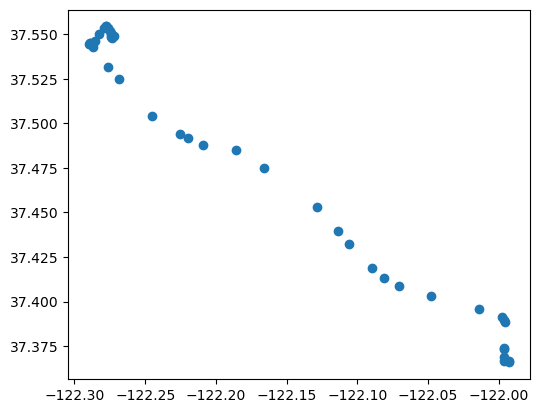

In [6]:
gdf.plot()

In [7]:
plot_trace(trace, point_color="black", line_color="yellow")

In [8]:
trace

Mappymatch Trace object
coords: [Coordinate(coordinate_id=1752492, x=-13611224.495622816, y=4515872.587200282, crs=('EPSG', '3857')), Coordinate(coordinate_id=1752493, x=-13611458.266553482, y=4515778.515034977, crs=('EPSG', '3857')), Coordinate(coordinate_id=1752494, x=-13611486.09642618, y=4515822.0408571, crs=('EPSG', '3857')), Coordinate(coordinate_id=1752495, x=-13611530.624222498, y=4516018.6113408245, crs=('EPSG', '3857')), Coordinate(coordinate_id=1752496, x=-13611532.850612314, y=4516121.1102718795, crs=('EPSG', '3857')), Coordinate(coordinate_id=1752497, x=-13611609.661060963, y=4516326.111145751, crs=('EPSG', '3857')), Coordinate(coordinate_id=1752498, x=-13611764.395153165, y=4516547.965931136, crs=('EPSG', '3857')), Coordinate(coordinate_id=1752499, x=-13611867.9222796, y=4516656.0867400635, crs=('EPSG', '3857')), Coordinate(coordinate_id=1752500, x=-13611889.072982853, y=4516654.682566553, crs=('EPSG', '3857')), Coordinate(coordinate_id=1752501, x=-13612025.995956527, y=4

In [9]:
geofence = Geofence.from_trace(trace, padding=1e3)


In [10]:
plot_trace(trace, point_color="black", m=plot_geofence(geofence))


In [11]:
nx_map = NxMap.from_geofence(geofence, network_type=NetworkType.DRIVE)

In [12]:
plot_map(nx_map)

In [13]:
matcher = LCSSMatcher(nx_map)
match_result = matcher.match_trace(trace)

In [14]:
plot_matches(match_result.matches)

In [15]:
# reduced_trace = trace[0::30]
# plot_trace(reduced_trace, point_color="black", line_color="yellow")
# reduced_matches = matcher.match_trace(reduced_trace)
# plot_matches(reduced_matches.matches)

In [16]:
plot_trace(trace, point_color="blue", m=plot_path(match_result.path, crs=trace.crs))

In [17]:
# plot_trace(reduced_trace, point_color="blue", m=plot_path(reduced_matches.path, crs=trace.crs))

In [18]:
result_df = match_result.matches_to_dataframe()
result_df.head()

coordinate_id  distance_to_road                    road_id  \
0        1752492         37.131890   (65395388, 276566344, 0)   
1        1752493          3.768171  (415168199, 415168195, 0)   
2        1752494          0.584147  (415168199, 415168195, 0)   
3        1752495          4.563891  (415168199, 415168195, 0)   
4        1752496          5.632155  (415168195, 415168193, 0)   

                                                geom  origin_junction_id  \
0  LINESTRING (-13611261.420297913 4515868.669849...            65395388   
1  LINESTRING (-13611454.926968759 4515764.081350...           415168199   
2  LINESTRING (-13611454.926968759 4515764.081350...           415168199   
3  LINESTRING (-13611454.926968759 4515764.081350...           415168199   
4  LINESTRING (-13611526.204838712 4516025.013984...           415168195   

   origin_destination_id  road_key  kilometers  travel_time  
0              276566344         0    0.108510         10.1  
1              415168195         0    0.217537         12.2  
2              415168195         0    0.217537         12.2  
3              415168195         0    0.217537         12.2  
4              415168193         0    0.099587          5.6

In [19]:
gdf.head()

trip_id          collect_time  accuracy  bearing  speed  \
1752492  2347455701047  2023-10-29T01:22:39Z       4.0     -1.0   -1.0   
1752493  2347455701047  2023-10-29T01:23:10Z       5.0    308.0    6.0   
1752494  2347455701047  2023-10-29T01:23:14Z       5.0    332.0   12.0   
1752495  2347455701047  2023-10-29T01:23:24Z       5.0    358.0   17.0   
1752496  2347455701047  2023-10-29T01:23:29Z       5.0    353.0   16.0   

              lat        lon                     geometry  
1752492  37.54874 -122.27171  POINT (-122.27171 37.54874)  
1752493  37.54807 -122.27381  POINT (-122.27381 37.54807)  
1752494  37.54838 -122.27406  POINT (-122.27406 37.54838)  
1752495  37.54978 -122.27446  POINT (-122.27446 37.54978)  
1752496  37.55051 -122.27448  POINT (-122.27448 37.55051)

In [20]:
result_df.dtypes

coordinate_id              int64
distance_to_road         float64
road_id                   object
geom                      object
origin_junction_id         int64
origin_destination_id      int64
road_key                   int64
kilometers               float64
travel_time              float64
dtype: object

<AxesSubplot:>

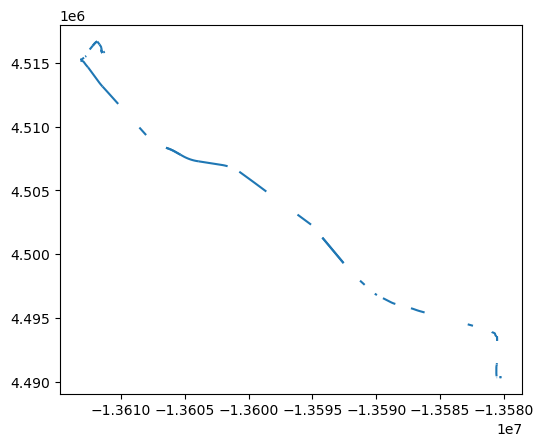

In [21]:
gpd.GeoDataFrame(result_df, geometry='geom', crs=3587).plot()
